In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from util import display_image

## gray-scale histogram

In [2]:
img = cv.imread('../img/mountain.jpg', cv.IMREAD_GRAYSCALE)

In [7]:
img.shape

(450, 600)

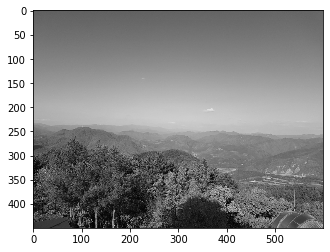

In [4]:
display_image(img, cmap='gray')

In [9]:
# [img]: object
# [0]: 1-channel (gray-scale)
# None: does not use mask
# [256]: x range
# [0, 256]: min, max (max=255+1, since max value is not included in histogram's range)
hist = cv.calcHist([img], [0], None, [256], [0, 256])

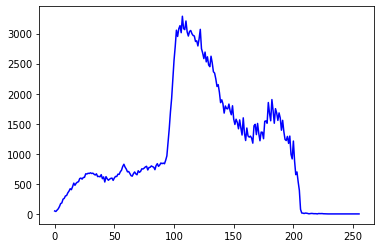

In [14]:
plt.plot(hist, color='blue')

In [13]:
hist.shape

(256, 1)

In [18]:
hist.sum()

270000.0

In [19]:
img.shape

(450, 600)

In [20]:
450 * 600

270000

## RGB histogram

In [21]:
img = cv.imread('../img/mountain.jpg')

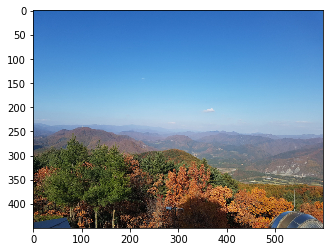

In [22]:
display_image(img)

* BGR order

In [23]:
channels = cv.split(img)

In [28]:
colors = ('b', 'g', 'r')

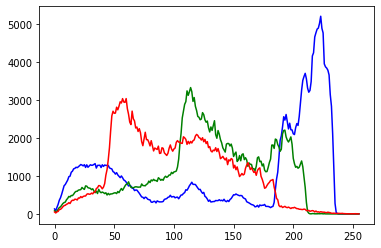

In [35]:
for ch, color in zip(channels, colors):
    hist = cv.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)

## histogram normalization
$$I_N = (I - Min) \frac{new Max - new Min}{Max - Min} + newMin$$

* Notations
    - $I$: raw image
    - $Min, \; Max$: max, min value of raw image
    - $newMin, \; newMax$: max, min value of normalized image
    - $I_N$: normalized image

* why normalize?
    - enhances resoultion when pixel value is not evenly distributed between 0-255
    - make range space equal when operating arithematics with two images

In [36]:
img = cv.imread('../img/abnormal.jpg', cv.IMREAD_GRAYSCALE)

In [38]:
img_f = img.astype(np.float32)
img_norm = (img_f - img_f.min())*(255) / (img_f.max() - img_f.min())
img_norm = img_norm.astype(np.uint8)

In [39]:
img_norm2 = cv.normalize(img, None, 0, 255, cv.NORM_MINMAX)

In [40]:
hist = cv.calcHist([img], [0], None, [266], [0, 255])
hist_norm = cv.calcHist([img_norm], [0], None, [266], [0, 255])
hist_norm2 = cv.calcHist([img_norm2], [0], None, [266], [0, 255])

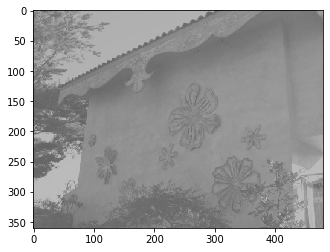

In [42]:
display_image(img, cmap='gray')

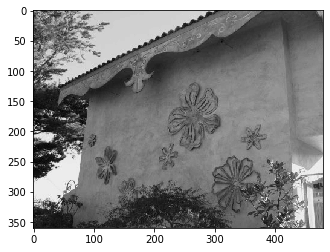

In [43]:
display_image(img_norm, cmap='gray')

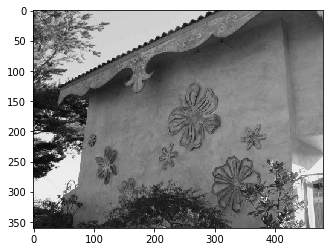

In [44]:
display_image(img_norm2, cmap='gray')

In [45]:
hists = {'before': hist, 'manual': hist_norm, 'cv': hist_norm2}

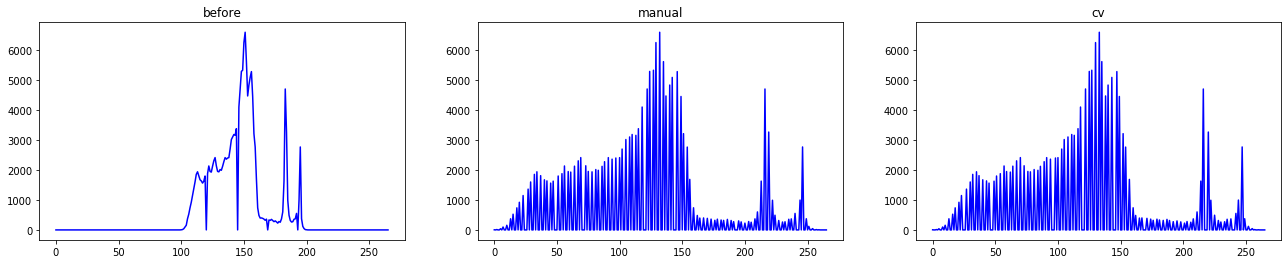

In [51]:
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1, 3, i+1)
    plt.title(k)
    plt.plot(v, color='blue')
    
plt.subplots_adjust(right=3)

## histogram equalization
$$H'(v) = round\bigg(\frac{cdf(v) - cdf_{min}}{(M\times N) - cdf_{min}} \times (L-1)\bigg)$$
* Notations:
    - $cdf(w)$ : histogram cdf
    - $cdf_{min}$: cumulative min, 1
    - $M\times N$: # of pixel, width\*height
    - $L$: range space, 256
    - $round(v)$: rounding
    - $H'(v)$: equalized hisogram
* why equalize?
    - cannot apply normalization
        - e.g. wants to normlize below scores to 70-100
            - 70, 96, 98, 98, 100

In [52]:
img = cv.imread('../img/yate.jpg', cv.IMREAD_GRAYSCALE)

In [53]:
rows, cols = img.shape[:2]

In [56]:
rows, cols

(480, 640)

In [57]:
hist = cv.calcHist([img], [0], None, [256], [0, 256])

In [71]:
# calc cumu cdf
cdf = hist.cumsum()
# converts 0 with nan
cdf_m = np.ma.masked_equal(cdf, 0)
# euqlize hist
cdf_m = (cdf_m - cdf_m.min()) / (rows*cols) * 255
# reverts nan to 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

img2 = cdf[img]

In [73]:
img3 = cv.equalizeHist(img)

In [74]:
hist2 = cv.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv.calcHist([img3], [0], None, [256], [0, 256])

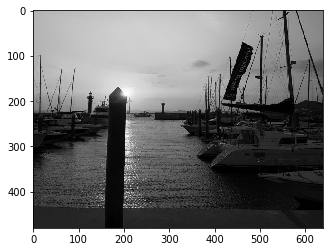

In [75]:
display_image(img, cmap='gray')

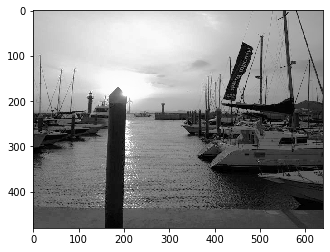

In [76]:
display_image(img2, cmap='gray')

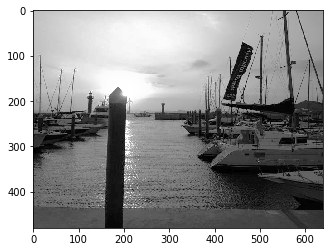

In [77]:
display_image(img3, cmap='gray')

In [78]:
hists = {'before': hist, 'manual': hist2, 'cv': hist3}

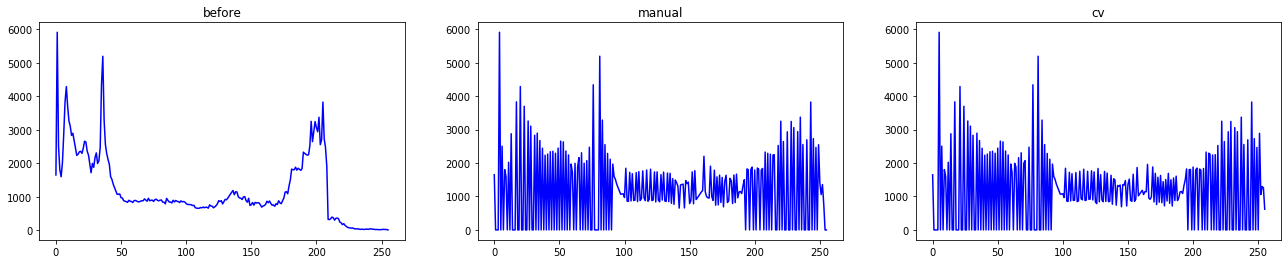

In [79]:
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1, 3, i+1)
    plt.title(k)
    plt.plot(v, color='blue')
    
plt.subplots_adjust(right=3)

## applying equalization to RGB image

In [80]:
img = cv.imread('../img/yate.jpg')

* equalizing illumination

In [81]:
img_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)

* c.f.
    - y: Luma
    - u: Chroma Blue
    - v: Chroma Red

In [84]:
img_yuv[:, :, 0] = cv.equalizeHist(img_yuv[:, :, 0])

In [85]:
img2 = cv.cvtColor(img_yuv, cv.COLOR_YUV2BGR)

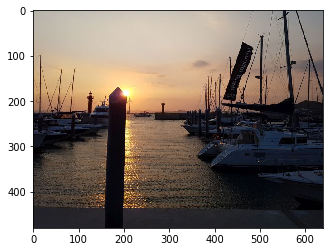

In [87]:
display_image(img)

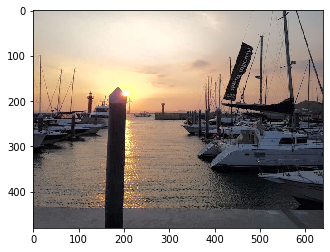

In [88]:
display_image(img2)

## CLAHE (Contrast Limiting Adaptive Histogram Equalization)
* avoid removing too bright parts when applying HE
* segmentize image and applying HE to each segments

In [95]:
img = cv.imread('../img/bright.jpg')

In [96]:
img_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)

In [98]:
img_eq = img_yuv.copy()
img_eq[:, :, 0] = cv.equalizeHist(img_eq[:, :, 0])
img_eq = cv.cvtColor(img_eq, cv.COLOR_YUV2BGR)

In [99]:
img_clahe = img_yuv.copy()
clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
img_clahe[:, :, 0] = clahe.apply(img_clahe[:, :, 0])
img_clahe = cv.cvtColor(img_clahe, cv.COLOR_YUV2BGR)

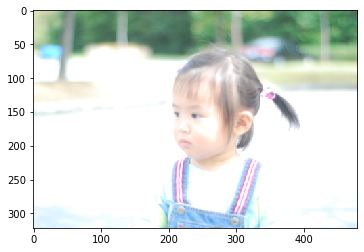

In [100]:
display_image(img)

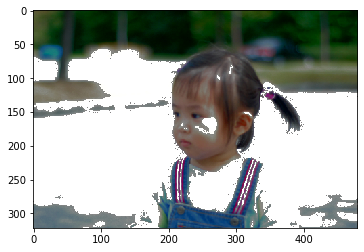

In [101]:
display_image(img_eq)

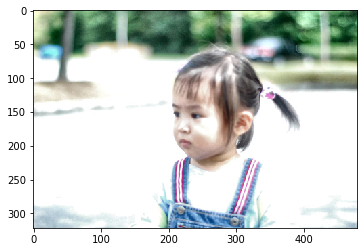

In [102]:
display_image(img_clahe)

## 2d-histogram

In [103]:
img = cv.imread('../img/mountain.jpg')

In [115]:
# [0, 1]: blue, green
hist = cv.calcHist([img], [0, 1], None, [32, 32], [0, 256, 0, 256])

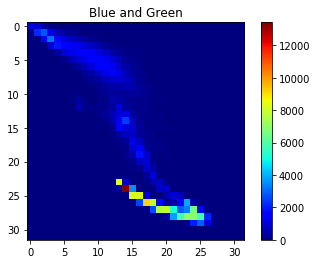

In [116]:
p = plt.imshow(hist, cmap='jet')
plt.title('Blue and Green')
plt.colorbar(p)

## back-projection

In [118]:
img = cv.imread('../img/pump_horse.jpg')

In [121]:
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

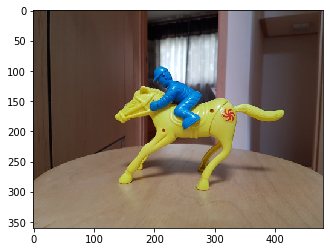

In [119]:
display_image(img)

In [120]:
def masking(bp, win_name):
    
    disc = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
    cv.filter2D(bp, -1, disc, bp)
    _, mask = cv.threshold(bp, 1, 255, cv.THRESH_BINARY)
    result = cv.bitwise_and(img, img, mask=mask)
    
    return result

In [126]:
def backProject_manual(hist_roi):
    
    hist_img = cv.calcHist([hsv_img], [0, 1], None, [180, 256], [0, 180, 0, 256])
    hist_rate = hist_roi / (hist_img+1)
    h, s, v = cv.split(hsv_img)
    bp = hist_rate[h.ravel(), s.ravel()]
    bp = np.minimum(bp, 1)
    bp = bp.reshape(hsv_img.shape[:2])
    cv.normalize(bp, bp, 0, 255, cv.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    
    return masking(bp, 'result_manual')

In [127]:
def backProject_cv(hist_roi):
    
    bp = cv.calcBackProject([hsv_img], [0, 1], hist_roi, [0, 180, 0, 256], 1)
    
    return masking(bp, 'result_cv')

In [160]:
draw = img.copy()

In [161]:
y = 170
h = 40
x = 210
w = 100

In [162]:
roi = draw[y:y+h, x:x+w]

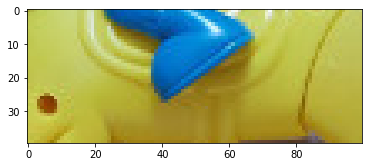

In [163]:
display_image(roi)

In [164]:
cv.rectangle(draw, (x, y), (x+w, y+h), (0, 0, 255), 2)

array([[[ 47,  63,  76],
        [ 48,  63,  79],
        [ 41,  56,  72],
        ...,
        [ 62,  71,  84],
        [106, 110, 121],
        [113, 112, 122]],

       [[ 47,  63,  76],
        [ 48,  63,  79],
        [ 41,  56,  72],
        ...,
        [ 63,  72,  85],
        [108, 112, 123],
        [116, 115, 125]],

       [[ 47,  63,  76],
        [ 48,  63,  79],
        [ 41,  56,  72],
        ...,
        [ 65,  74,  87],
        [108, 113, 122],
        [115, 114, 123]],

       ...,

       [[121, 140, 155],
        [123, 142, 157],
        [125, 144, 159],
        ...,
        [102, 121, 136],
        [102, 121, 136],
        [102, 121, 136]],

       [[118, 139, 154],
        [120, 141, 156],
        [122, 143, 158],
        ...,
        [102, 121, 136],
        [102, 121, 136],
        [102, 121, 136]],

       [[117, 138, 153],
        [118, 139, 154],
        [119, 140, 155],
        ...,
        [102, 121, 136],
        [102, 121, 136],
        [102, 121, 136]]

In [165]:
hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

In [166]:
hist_roi = cv.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])

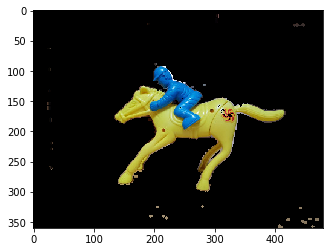

In [167]:
display_image(backProject_manual(hist_roi))

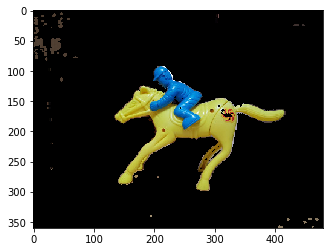

In [168]:
display_image(backProject_cv(hist_roi))

## compare histogram

In [175]:
img1 = cv.imread('../img/taekwonv1.jpg')
img2 = cv.imread('../img/taekwonv2.jpg')
img3 = cv.imread('../img/taekwonv3.jpg')
img4 = cv.imread('../img/dr_ochanomizu.jpg')

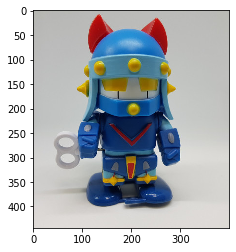

In [176]:
display_image(img1)

In [177]:
imgs = [img1, img2, img3, img4]

In [178]:
hists = []

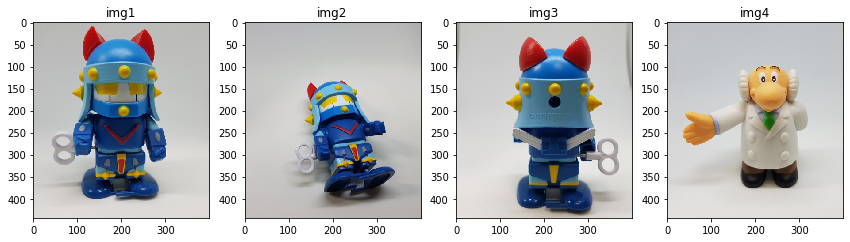

In [182]:
for i, img in enumerate(imgs):
    plt.subplot(1, len(imgs), i+1)
    plt.title('img{:d}'.format(i+1))
    plt.imshow(img[:, :, ::-1])
    
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    hist = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
    
    cv.normalize(hist, hist, 0, 1, cv.NORM_MINMAX)
    hists.append(hist)
    
plt.subplots_adjust(right=2)

In [183]:
query = hists[0]

* CORREL: correlation (1: best, -1: worst, 0: no corr)
* CHISQR: chi-square (0: best, large values: worst)
* INTERSECT: intersection (1: best, 0: worst (when normalized with 1))
* BHATTACHARYYA: bhattacharyya (0: best, 1: worst)

In [197]:
methods = {
    'CORREL': cv.HISTCMP_CORREL,
    'CHISQR': cv.HISTCMP_CHISQR,
    'INTERSECT': cv.HISTCMP_INTERSECT,
    'BHATTACHARYYA': cv.HISTCMP_BHATTACHARYYA
}

In [198]:
for j, (name, flag) in enumerate(methods.items()):
    print('{}'.format(name), end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        ret = cv.compareHist(query, hist, flag)
        if flag == cv.HISTCMP_INTERSECT:
            ret = ret / np.sum(query)            
        print('img{:d}:{:7.2f}'.format(i+1, ret), end='\t')
    print()

# plt.show()

CORREL	img1:   1.00	img2:   0.70	img3:   0.56	img4:   0.23	
CHISQR	img1:   0.00	img2:  67.33	img3:  35.71	img4:1129.49	
INTERSECT	img1:   1.00	img2:   0.54	img3:   0.40	img4:   0.18	
BHATTACHARYYA	img1:   0.00	img2:   0.48	img3:   0.47	img4:   0.79	


## Exercise1: composite image

In [222]:
alpha_width_rate = 15

In [223]:
img_face = cv.imread('../img/man_face.jpg')
img_skull = cv.imread('../img/skull.jpg')

In [224]:
# insert target image into this empty array
img_comp = np.zeros_like(img_face)

In [234]:
height, width = img_face.shape[:2]
print(height, width)

475 640


In [228]:
# center coordinate
middle = width // 2
# alpha blending range
alpha_width = width * alpha_width_rate // 100
# alpha blending start point
start = middle - alpha_width // 2
# alpha interval
step = 100 / alpha_width

print(middle, alpha_width, start, step)

320 96 272 1.0416666666666667


In [240]:
img_comp[:, :middle, :] = img_face[:, :middle, :].copy()
img_comp[:, middle:, :] = img_skull[:, middle:, :].copy()

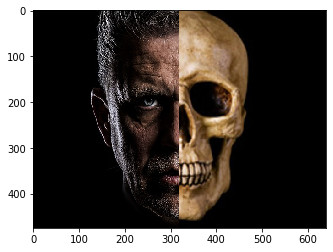

In [241]:
display_image(img_comp)

In [243]:
# applying alpha blending
for i in range(alpha_width+1):
    alpha = (100 - step*i) / 100
    beta = 1-alpha
    
    img_comp[:, start+i] = img_face[:, start+i]*alpha + img_skull[:, start+i]*beta
    
    print(i, start+i, alpha, beta)

0 272 1.0 0.0
1 273 0.9895833333333333 0.01041666666666674
2 274 0.9791666666666667 0.02083333333333326
3 275 0.96875 0.03125
4 276 0.9583333333333333 0.04166666666666674
5 277 0.9479166666666667 0.05208333333333326
6 278 0.9375 0.0625
7 279 0.9270833333333333 0.07291666666666674
8 280 0.9166666666666667 0.08333333333333326
9 281 0.90625 0.09375
10 282 0.8958333333333333 0.10416666666666674
11 283 0.8854166666666667 0.11458333333333326
12 284 0.875 0.125
13 285 0.8645833333333333 0.13541666666666674
14 286 0.8541666666666667 0.14583333333333326
15 287 0.84375 0.15625
16 288 0.8333333333333333 0.16666666666666674
17 289 0.8229166666666665 0.17708333333333348
18 290 0.8125 0.1875
19 291 0.8020833333333333 0.19791666666666674
20 292 0.7916666666666665 0.20833333333333348
21 293 0.78125 0.21875
22 294 0.7708333333333333 0.22916666666666674
23 295 0.7604166666666665 0.23958333333333348
24 296 0.75 0.25
25 297 0.7395833333333333 0.26041666666666674
26 298 0.7291666666666665 0.270833333333333

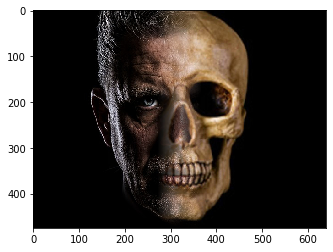

In [244]:
display_image(img_comp)